In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [2]:
#import libraries

import scipy.io
import numpy as np
import pandas as pd

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import metrics
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt

from helperScript import *

In [3]:
#IMPORT DATASETS AND PATH 
##https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/ (data link)
plots = r"C:....\plots"
models =r"C:....\models"
mat = scipy.io.loadmat(r"...\wiki_crop\wiki_crop\wiki.mat")
cols = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]
instances = mat['wiki'][0][0][0].shape[1]
df = pd.DataFrame(index = range(0,instances), columns = cols)
for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]
        for j in range(len(current_array)):
            df[cols[j]] = pd.DataFrame(current_array[j][0])


In [4]:
#convert data time
df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)
df['age'] = df['photo_taken'] - df['date_of_birth']

In [5]:
#CLEANING DATASET
df = clean_data(df)
df = df.drop(columns = ['name','face_score','second_face_score','date_of_birth','face_location'])
df = df[(df.age < 100) & (df.age < 100)]
age_dist=df['age'].value_counts().sort_index()
age_dist.to_csv(plots+"/age_dist.csv")
print("Age distribution :",age_dist)

Age distribution : -7     1
 0     2
 1     2
 5     1
 6     2
      ..
 95    4
 96    1
 97    3
 98    2
 99    1
Name: age, Length: 98, dtype: int64


In [6]:
classes = 101 #(0,100)


df['pixels'] = df['full_path'].apply(getImagePixels)
target = df['age'].values
target_classes = to_categorical(target, classes)

features = feature_normalization(df)

In [7]:

train_x, test_x, train_y, test_y = train_test_split(features, target_classes
                                        , test_size=0.30)#, random_state=42), stratify=target_classes)

In [8]:
#get vggfacemodel
model = VggFaceModel()
model.load_weights(r"C:...\vgg_face_weights.h5")

In [ ]:
#vgg_weight_link :https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view

In [9]:
model = freeze_layers_2(model)
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath=models+'/age_model_son.h5', verbose=1, save_best_only=True, mode = 'auto')

In [10]:
#MODEL cOMPILING

scores = []
epochs = 250
batch_size = 256
for i in range(epochs):
    print("epoch ",i)
    ix_train = np.random.choice(train_x.shape[0], size=batch_size)
    score = model.fit(train_x[ix_train], train_y[ix_train], epochs=1, validation_data=(test_x, test_y), callbacks=[checkpointer],verbose=1)
    scores.append(score)
    model.save_weights(models+'/age_model_weights.h5')
    model_json = model.to_json()
    with open(models+"/age_model_weights.json", "w") as json_file:
        json_file.write(model_json)


epoch  0
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 1s - loss: 23.6305 - accuracy: 0.0179
Epoch 00001: val_loss improved from inf to 4.82430, saving model to C:\Users\T-x23\Downloads\bsc\model_building\models/age_model_son.h5
256/256 [==============================] - 60s 236ms/sample - loss: 21.3093 - accuracy: 0.0195 - val_loss: 4.8243 - val_accuracy: 0.0178
epoch  1
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.5965 - accuracy: 0.0268
Epoch 00001: val_loss improved from 4.82430 to 4.23544, saving model to C:\Users\T-x23\Downloads\bsc\model_building\models/age_model_son.h5
256/256 [==============================] - 53s 206ms/sample - loss: 4.5166 - accuracy: 0.0352 - val_loss: 4.2354 - val_accuracy: 0.0277
epoch  2
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.7089 - accuracy: 0.0312
Epoch 00001: val_loss impro

224/256 [=========================>....] - ETA: 0s - loss: 4.6100 - accuracy: 0.0402
Epoch 00001: val_loss improved from 4.06346 to 4.05912, saving model to C:\Users\T-x23\Downloads\bsc\model_building\models/age_model_son.h5
256/256 [==============================] - 53s 208ms/sample - loss: 4.5292 - accuracy: 0.0391 - val_loss: 4.0591 - val_accuracy: 0.0330
epoch  24
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.5391 - accuracy: 0.0402
Epoch 00001: val_loss did not improve from 4.05912
256/256 [==============================] - 51s 199ms/sample - loss: 4.5714 - accuracy: 0.0391 - val_loss: 4.0947 - val_accuracy: 0.0309
epoch  25
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0777 - accuracy: 0.0268
Epoch 00001: val_loss improved from 4.05912 to 4.05580, saving model to C:\Users\T-x23\Downloads\bsc\model_building\models/age_model_son.h5
256/256 [===================

epoch  71
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0397 - accuracy: 0.0268
Epoch 00001: val_loss did not improve from 4.04087
256/256 [==============================] - 51s 200ms/sample - loss: 4.0497 - accuracy: 0.0273 - val_loss: 4.0494 - val_accuracy: 0.0262
epoch  72
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0268 - accuracy: 0.0357
Epoch 00001: val_loss did not improve from 4.04087
256/256 [==============================] - 51s 201ms/sample - loss: 4.0319 - accuracy: 0.0430 - val_loss: 4.0506 - val_accuracy: 0.0262
epoch  73
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0740 - accuracy: 0.0357
Epoch 00001: val_loss did not improve from 4.04087
256/256 [==============================] - 51s 200ms/sample - loss: 4.0636 - accuracy: 0.0352 - val_loss: 4.0512 - val_accuracy: 0.0360
epoch  74
Tra

epoch  120
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.5184 - accuracy: 0.0179
Epoch 00001: val_loss did not improve from 4.03711
256/256 [==============================] - 51s 200ms/sample - loss: 4.4629 - accuracy: 0.0195 - val_loss: 4.3596 - val_accuracy: 0.0366
epoch  121
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.1797 - accuracy: 0.0179  
Epoch 00001: val_loss did not improve from 4.03711
256/256 [==============================] - 51s 200ms/sample - loss: 4.1587 - accuracy: 0.0234 - val_loss: 4.0473 - val_accuracy: 0.0435
epoch  122
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.1049 - accuracy: 0.0402
Epoch 00001: val_loss did not improve from 4.03711
256/256 [==============================] - 51s 200ms/sample - loss: 4.0977 - accuracy: 0.0391 - val_loss: 4.0435 - val_accuracy: 0.0358
epoch  1

224/256 [=========================>....] - ETA: 0s - loss: 4.1980 - accuracy: 0.0402
Epoch 00001: val_loss did not improve from 4.03343
256/256 [==============================] - 51s 200ms/sample - loss: 4.1693 - accuracy: 0.0391 - val_loss: 4.0396 - val_accuracy: 0.0303
epoch  145
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.1019 - accuracy: 0.0223
Epoch 00001: val_loss did not improve from 4.03343
256/256 [==============================] - 51s 200ms/sample - loss: 4.0842 - accuracy: 0.0234 - val_loss: 4.0387 - val_accuracy: 0.0358
epoch  146
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0866 - accuracy: 0.0402
Epoch 00001: val_loss did not improve from 4.03343
256/256 [==============================] - 51s 200ms/sample - loss: 4.0863 - accuracy: 0.0391 - val_loss: 4.0350 - val_accuracy: 0.0435
epoch  147
Train on 256 samples, validate on 6641 samples
224/256 [=

epoch  169
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 5.3329 - accuracy: 0.0491
Epoch 00001: val_loss did not improve from 4.03316
256/256 [==============================] - 51s 200ms/sample - loss: 5.1849 - accuracy: 0.0430 - val_loss: 4.0339 - val_accuracy: 0.0358
epoch  170
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 6.3452 - accuracy: 0.0357
Epoch 00001: val_loss did not improve from 4.03316
256/256 [==============================] - 51s 200ms/sample - loss: 6.0459 - accuracy: 0.0430 - val_loss: 4.0380 - val_accuracy: 0.0435
epoch  171
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0758 - accuracy: 0.0223
Epoch 00001: val_loss did not improve from 4.03316
256/256 [==============================] - 51s 200ms/sample - loss: 4.0910 - accuracy: 0.0195 - val_loss: 4.0463 - val_accuracy: 0.0303
epoch  172

epoch  194
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0941 - accuracy: 0.0402
Epoch 00001: val_loss did not improve from 4.03101
256/256 [==============================] - 51s 200ms/sample - loss: 4.0845 - accuracy: 0.0430 - val_loss: 4.0383 - val_accuracy: 0.0330
epoch  195
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 3.9100 - accuracy: 0.0491
Epoch 00001: val_loss did not improve from 4.03101
256/256 [==============================] - 51s 200ms/sample - loss: 3.8934 - accuracy: 0.0469 - val_loss: 4.0451 - val_accuracy: 0.0330
epoch  196
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.1295 - accuracy: 0.0312
Epoch 00001: val_loss did not improve from 4.03101
256/256 [==============================] - 51s 200ms/sample - loss: 4.3414 - accuracy: 0.0273 - val_loss: 4.0560 - val_accuracy: 0.0303
epoch  197

epoch  219
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0126 - accuracy: 0.0491
Epoch 00001: val_loss did not improve from 4.03101
256/256 [==============================] - 51s 200ms/sample - loss: 4.0026 - accuracy: 0.0508 - val_loss: 4.0388 - val_accuracy: 0.0331
epoch  220
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.1225 - accuracy: 0.0402
Epoch 00001: val_loss did not improve from 4.03101
256/256 [==============================] - 51s 200ms/sample - loss: 4.1142 - accuracy: 0.0352 - val_loss: 4.0371 - val_accuracy: 0.0330
epoch  221
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0605 - accuracy: 0.0312
Epoch 00001: val_loss did not improve from 4.03101
256/256 [==============================] - 51s 200ms/sample - loss: 4.0647 - accuracy: 0.0273 - val_loss: 4.0382 - val_accuracy: 0.0330
epoch  222

epoch  244
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.0964 - accuracy: 0.0268
Epoch 00001: val_loss did not improve from 4.03101
256/256 [==============================] - 51s 198ms/sample - loss: 4.0794 - accuracy: 0.0234 - val_loss: 4.0338 - val_accuracy: 0.0395
epoch  245
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 6.0284 - accuracy: 0.0312
Epoch 00001: val_loss did not improve from 4.03101
256/256 [==============================] - 51s 198ms/sample - loss: 5.7767 - accuracy: 0.0352 - val_loss: 4.0333 - val_accuracy: 0.0395
epoch  246
Train on 256 samples, validate on 6641 samples
224/256 [=========================>....] - ETA: 0s - loss: 4.4947 - accuracy: 0.0268
Epoch 00001: val_loss did not improve from 4.03101
256/256 [==============================] - 51s 198ms/sample - loss: 4.4210 - accuracy: 0.0273 - val_loss: 4.0344 - val_accuracy: 0.0330
epoch  247

In [11]:
val_loss_change = []
loss_change = []
for i in range(0, len(scores)):
    val_loss_change.append(scores[i].history['val_loss'])
    loss_change.append(scores[i].history['loss'])

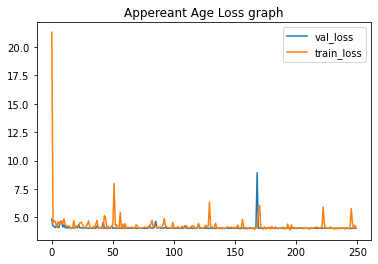

In [12]:
plt.plot(val_loss_change, label='val_loss')
plt.plot(loss_change, label='train_loss')
plt.legend(loc='upper right')
plt.title("Appereant Age Loss graph")
plt.savefig(plots+"\Appereant Age loss graph")

plt.show()

In [13]:

acc_loss_change = []
acc_change = []
for i in range(0, len(scores)):
    acc_loss_change.append(scores[i].history['accuracy'])
    acc_change.append(scores[i].history['val_accuracy'])

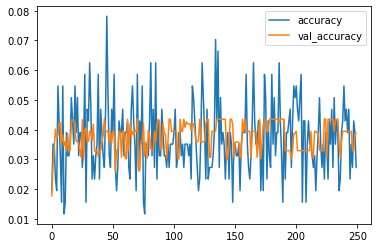

In [14]:
plt.plot(acc_loss_change, label='accuracy')
plt.plot(acc_change, label='val_accuracy')
plt.legend(loc='upper right')
plt.savefig(plots+"\Appereant accuracy graph")

plt.show()

In [15]:
#Model evaluation on test set
#loss and accuracy on validation set
print("Model Scores: ",model.evaluate(test_x, test_y, verbose=1))
predictions = model.predict(test_x)
output_indexes = np.array([i for i in range(0, 101)])
apparent_predictions = np.sum(predictions * output_indexes, axis = 1)

6641/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Model Scores:  [4.035620549234563, 0.03869899]


In [16]:
mae = 0

for i in range(0 ,apparent_predictions.shape[0]):
    prediction = int(apparent_predictions[i])
    actual = np.argmax(test_y[i])
    
    abs_error = abs(prediction - actual)
    #actual_mean = actual_mean + actual
    
    mae = mae + abs_error
    
mae = mae / apparent_predictions.shape[0]

print("mae: ",mae)
print("instances: ",apparent_predictions.shape[0])

mae:  13.224213220900467
instances:  6641


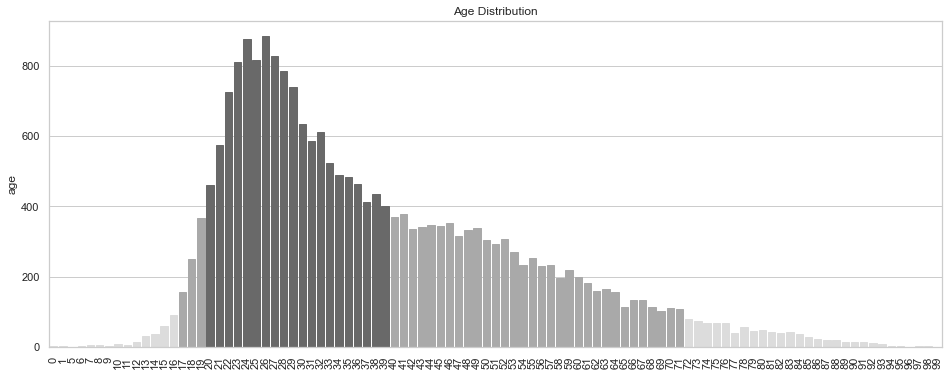

In [144]:
import seaborn
import numpy

data = pd.read_csv(r"C:......\plots\age_dist.csv",index_col=0)
data = data[1:]
values = data.age 
idx = data.index
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title("Age Distribution")
ax = seaborn.barplot(x=idx, y=values) # or use ax=your_axis_object

for bar in ax.patches:
    if bar.get_height() > 400:
        bar.set_color('dimgrey')
    elif bar.get_height() < 400 and bar.get_height() >100 :
        bar.set_color('darkgrey')
    else:
        bar.set_color('gainsboro')

In [104]:
gender = pd.read_csv(r"C:\....\plots\gender_dist.csv",index_col=0)

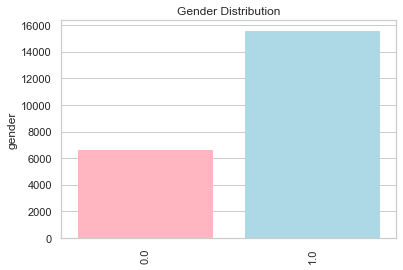

In [111]:
values = gender.gender 
idx = gender.index
#plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title("Gender Distribution")
ax = seaborn.barplot(x=idx, y=values) # or use ax=your_axis_object

for bar in ax.patches:
    if bar.get_height() > 6580:
        bar.set_color('lightblue')
    else:
        bar.set_color('lightpink')

In [116]:

#train= pd.read_csv(r"C:\Users\T-x23\Downloads\bsc\model_building\plots\train_size_race.csv")
train_per = pd.read_csv(r"C:\...\plots\combine_train_dist.csv")
combine = pd.read_csv(r"C:\...\plots\combine_race_numbers.csv")
test_per = pd.read_csv(r"C:\...\plots\percentage_test_dist.csv")

In [120]:
test_size_race = pd.read_csv(r"C:\...\plots\test_size_race.csv")
train_size_race = pd.read_csv(r"C:\....\plots\train_size_race.csv")

In [123]:
combine

,race,0
0,Asian,23082
1,Black,12233
2,Indian,12319
3,Latino_Hispanic,13367
4,Middle Eastern,9216
5,White,16527


In [153]:
test_size_race.iloc[::,1].sum()

10954

In [154]:
test_size_race

,race,0
0,Black,1556
1,East Asian,1550
2,Indian,1516
3,Latino_Hispanic,1623
4,Middle Eastern,1209
5,Southeast Asian,1415
6,White,2085


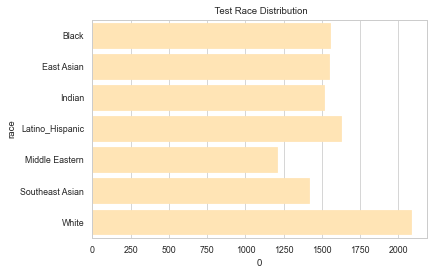

In [171]:
values = test_size_race.race 
idx = test_size_race.iloc[::,1]
#plt.figure(figsize=(16, 6))
#plt.xticks(rotation=90)
plt.title(" Test Race Distribution")
ax = seaborn.barplot(x=idx, y=values) # or use ax=your_axis_object

for bar in ax.patches:
    if bar.get_height() < 1500:
        bar.set_color('moccasin')
    else:
        bar.set_color('chartreuse')

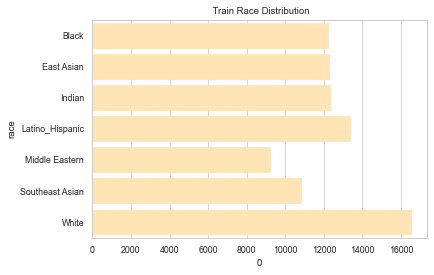

In [172]:
values = train_size_race.race 
idx = train_size_race.iloc[::,1]
plt.title(" Train Race Distribution")
ax = seaborn.barplot(x=idx, y=values) # or use ax=your_axis_object

for bar in ax.patches:
    if bar.get_height() < 1500:
        bar.set_color('moccasin')
    else:
        bar.set_color('gainsboro')